 # TE and TM Bloch Surface Waves

In this notebook we calculate the optical spectrar for a 1D photonic crystal structured to support Bloch Surface Waves (BSW). The structure is taken from the paper:

Sinibaldi, A. et al. **Combining label-free and fluorescence operation of Bloch surface wave optical sensors.** *Opt. Lett.* 39, 2947–2950 (2014).

 
 The notebook is structured as follows:
 -  Setup of useful settings and import of necessary libraries
 -  Inputs for the simulation
 -  Computation
 - Plot


## Settings and libraries

In [1]:
# libraries
import numpy as np # numpy
import sys                  # sys to add py_matrix to the path

# matplotlib inline plots
import matplotlib.pylab as plt
%matplotlib inline

# adding py_matrix parent folder to python path
sys.path.append('../../')
import py_matrix as pm # importing py_matrix

# useful parameters
f_size=20;

## Inputs
- Loading optical constants and building the optical constant database
- Setting the inputs such as layer compositionm thickness, incident angles, etc...

In [2]:
# building the optical constant database, point the folder below to the "materials" py_matrix folder
eps_db_out=pm.mat.generate_eps_db('../materials/',ext='*.edb')
eps_files,eps_names,eps_db=eps_db_out['eps_files'],eps_db_out['eps_names'],eps_db_out['eps_db']

In [3]:
# multilayer composition
n_inc = 1.53  # BK7
n_h = 2.06 + 0.001*1j
n_l = 1.454 + 0.0001*1j
n_sub = 1.33
e_list=np.array([n_inc,n_l,n_h,n_l,n_h,n_l,n_h,n_l,n_h,n_l,n_sub])**2

# multilayer thicknesses: incident medium and substrate have zero thickness
d_h = 170.0
d_l = 495.0
d_list = np.array([0.0,d_l,d_h,d_l,d_h,d_l,d_h,d_l,d_h,d_l,0.0]) 

wl_0 = 804  # incident wavelenght in nm
# polar angle in radians
theta_min = 60.5*np.pi/1.8e2;
theta_max = 68*np.pi/1.8e2;
theta_step = 1000;
v_theta = np.linspace(theta_min,theta_max,theta_step)
# azimuthal angle radians
phi_0 = 0.0;

## Computation
- Filling of the dielectric tensor at $\lambda$=804 nm
- Initialization of the reflectance output vector
- Polar angle loop

In [4]:
# optical constant tensor
m_eps=np.zeros((len(e_list),3,3),dtype=np.complex128);
m_eps[:,0,0]=e_list # filling dielectric tensor diagonal
m_eps[:,1,1]=e_list
m_eps[:,2,2]=e_list

# initializing reflectance output vector
v_r_p=np.zeros_like(v_theta)
v_r_s=np.zeros_like(v_theta)

# angle loop
for i_t,t in enumerate(v_theta):
        
    #------Computing------
    m_r_ps=pm.core.rt(wl_0,t,phi_0,m_eps,d_list)['m_r_ps'] # reflection matrix
    v_r_p[i_t]=pm.utils.R_ps_rl(m_r_ps)['R_p'] # getting p-polarized reflectance (TM)
    v_r_s[i_t]=pm.utils.R_ps_rl(m_r_ps)['R_s'] # getting s-polarized reflectance (TE)

## Plot of the reflectance spectrum at $\lambda$ = 804 nm

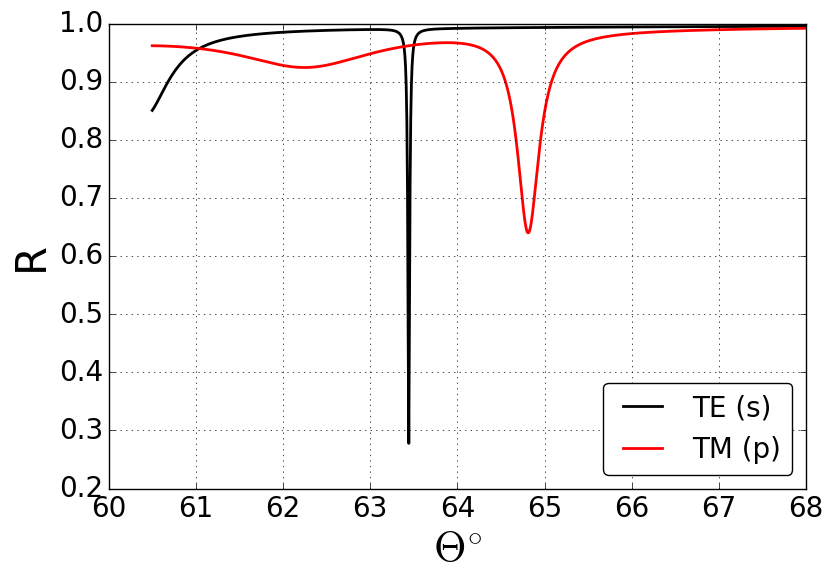

In [5]:
# reflectivity plots
plt.figure(1,figsize=(9,6))
plt.plot(v_theta*1.8e2/np.pi,v_r_s,'k',linewidth=2.0)
plt.plot(v_theta*1.8e2/np.pi,v_r_p,'r',linewidth=2.0)


# labels
plt.xlabel(r'$\Theta^{\circ}$',fontsize=f_size+10)
plt.ylabel('R',fontsize=f_size+10)

# ticks
plt.xticks(fontsize=f_size)
plt.yticks(fontsize=f_size)

# grids
plt.grid()

#legends
plt.legend(['TE (s)','TM (p)'],loc='lower right',fontsize=f_size,fancybox=True);

## Plot of the local fields at $\lambda=804$ nm at the TE and TM coupling angle

In [6]:
# fields components and wavevectors
theta_0_p = v_theta[v_r_p.argmin()]  # getting the TM coupling angle
theta_0_s = v_theta[v_r_s.argmin()]  # getting the TE coupling angle
out_p = pm.core.rt(wl_0,theta_0_p,phi_0,m_eps,d_list) # reflection matrix
out_s = pm.core.rt(wl_0,theta_0_s,phi_0,m_eps,d_list) # reflection matrix
m_Kn_p = out_p['m_Kn']
m_Hn_p = out_p['m_Hn']
m_En_p = out_p['m_En']
m_Kn_s = out_s['m_Kn']
m_Hn_s = out_s['m_Hn']
m_En_s = out_s['m_En']

# computing the field, absorbed power and Poynting vector
v_z = np.linspace(-1000,5000,1000)  # z probing
v_field_s = np.array([np.abs(pm.utils.field(m_Kn_s,m_En_s,m_Hn_s,e_list,d_list,0.0,0.0,z,'TE')['E'][1]) for z in v_z])
v_field_p = np.array([np.abs(pm.utils.field(m_Kn_p,m_En_p,m_Hn_p,e_list,d_list,0.0,0.0,z,'TM')['H'][1]) for z in v_z])

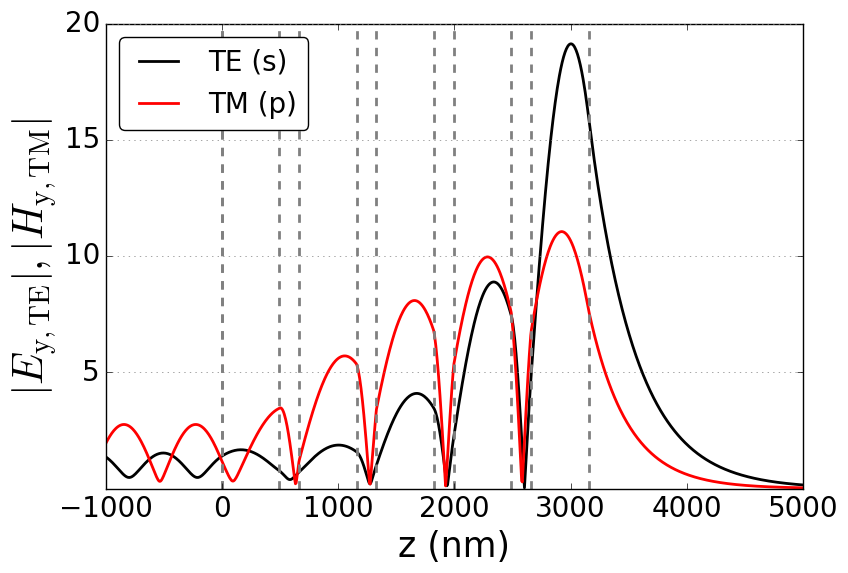

In [7]:
# field plots
plt.figure(figsize=(9,6))

# plot
plt.plot(v_z,v_field_s,'k',linewidth=2.0)
plt.plot(v_z,v_field_p,'r',linewidth=2.0)
for n_d,d in enumerate(d_list):
    plt.axvline(d_list[0:n_d].sum(),color='gray',linestyle='dashed',linewidth=2.0)    

# labels
plt.ylabel(r'$|E_{\mathrm{y,TE}}|,|H_{\mathrm{y,TM}}|$',fontsize=f_size+10)
plt.xlabel(r'z (nm)',fontsize=f_size+5)

# ticks
plt.xticks(fontsize=f_size)
plt.yticks([5,10,15,20],fontsize=f_size)

# grids
plt.grid(color='gray',axis='y')

# legend
plt.legend(['TE (s)','TM (p)'],loc='upper left',fontsize=f_size,fancybox=True);